In [56]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
df_X=pd.DataFrame(X)
y_vals=np.array(y)
Xtrain = X[:9900]
Xtest = X[9900:]
ytrain = y[:9900]
ytest = y[9900:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

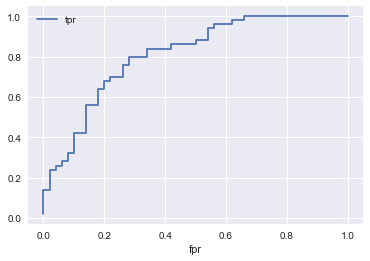

In [65]:
from sklearn import metrics
import pandas as pd
%matplotlib inline
preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
df_X=pd.DataFrame(X)
df_X['score']=clf.predict_proba(df_X)[:,1]
df_X['outcome']=y_vals

df.plot(x='fpr',y='tpr')


0.0


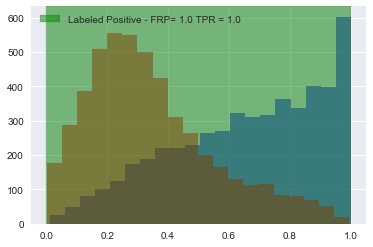

0.1


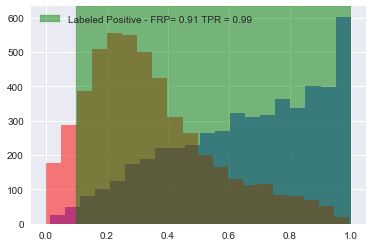

0.2


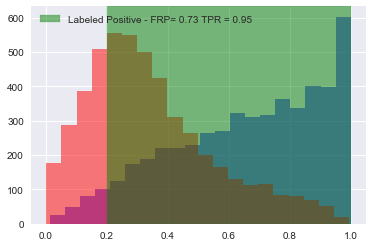

0.3


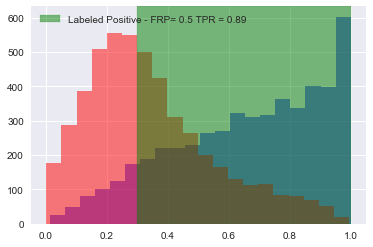

0.4


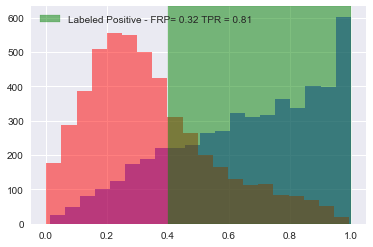

0.5


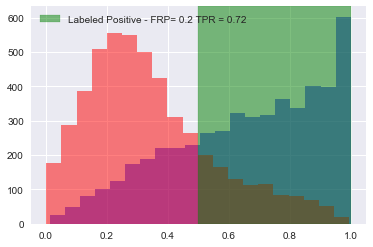

0.6


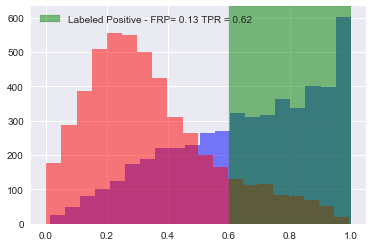

0.7


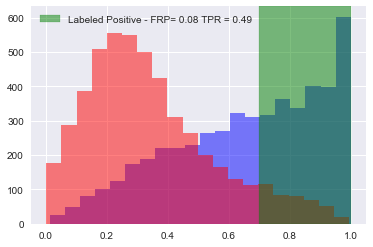

0.8


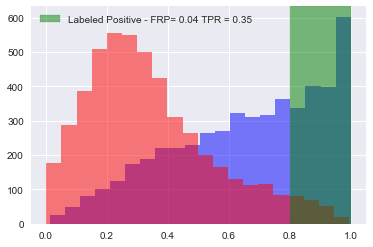

0.9


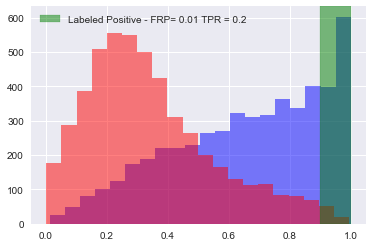

1.0


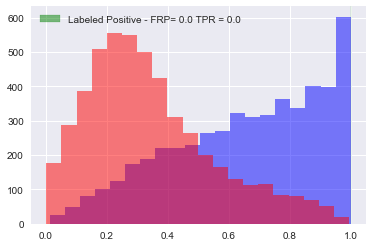

In [72]:
import seaborn
import matplotlib.pyplot as plt
fprs=[]
tprs=[]
for i in range(0,11):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    fpr = np.round(len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==0]),2)
    tpr = np.round(len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==1]),2)
    fprs.append(fpr)
    tprs.append(tpr)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - FRP= ' + str(fpr)+' TPR = ' + str(tpr))
    plt.legend()
    plt.savefig("../img/roc_" + str(i) + ".png")
    plt.show()



TypeError: print_figure() missing 1 required positional argument: 'filename'

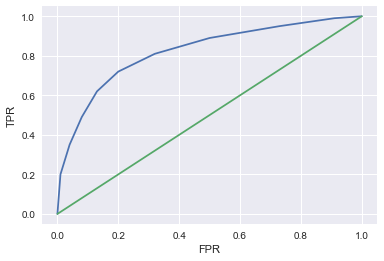

In [74]:
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.plot(fprs,tprs)
plt.plot(fprs,fprs)
plt.savefig()

In [ ]:
df

In [13]:
len(df)

280